In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mydataset= pd.read_csv("athlete_events.csv")
mydataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df=mydataset.copy()
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [15]:
df["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [ ]:
year = df['Year']
athletes = df['Name']

# Scatter plot'u çiz
plt.scatter(year, athletes)
plt.xlabel('Year')
plt.ylabel('Name')
plt.title('Year vs Athletes Scatter Plot')
plt.show()

**Bar plot kullanarak Olimpiyat Oyunu başına atlet sayısını görüntüleyin.

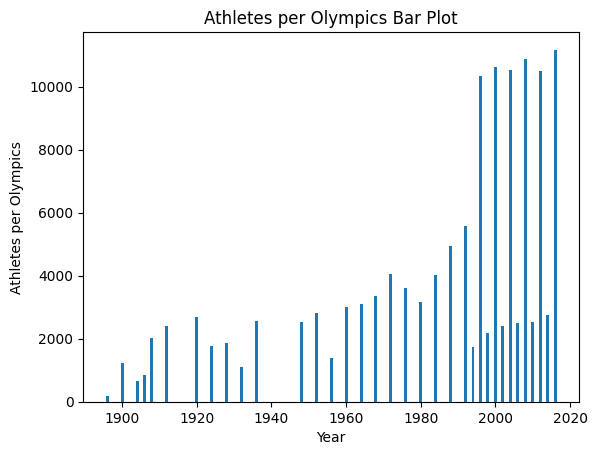

In [24]:


# Her Olimpiyat Oyunu için atlet sayısını hesapla
olympics = df.groupby('Year')['Name'].nunique()
atletes_per_olympics = olympics / df.groupby('Year')['City'].nunique()

# Bar plot'u çiz
plt.bar(atletes_per_olympics.index, atletes_per_olympics.values)
plt.xlabel('Year')
plt.ylabel('Athletes per Olympics')
plt.title('Athletes per Olympics Bar Plot')
plt.show()


**Box plot grafiğinde, Season a göre gruplandırılmış Olimpiyat oyunları sırasında sporcu sayısının dağılımını gösterin.

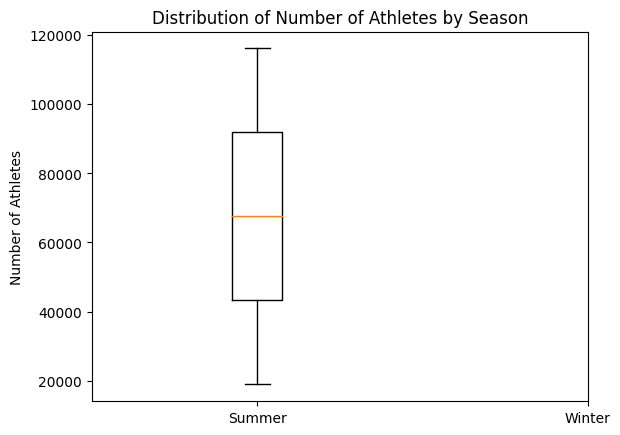

In [25]:
athletes_by_season = df.groupby('Season')['Name'].nunique()

# Box plot'u çiz
plt.boxplot([df[df['Season'] == 'Summer']['Name'].nunique(), df[df['Season'] == 'Winter']['Name'].nunique()])
plt.xticks([1, 2], ['Summer', 'Winter'])
plt.ylabel('Number of Athletes')
plt.title('Distribution of Number of Athletes by Season')
plt.show()

**Her yıl için spor başına atlet sayısını çizin. Her spor için, her yıl bir nokta çizilmelidir.

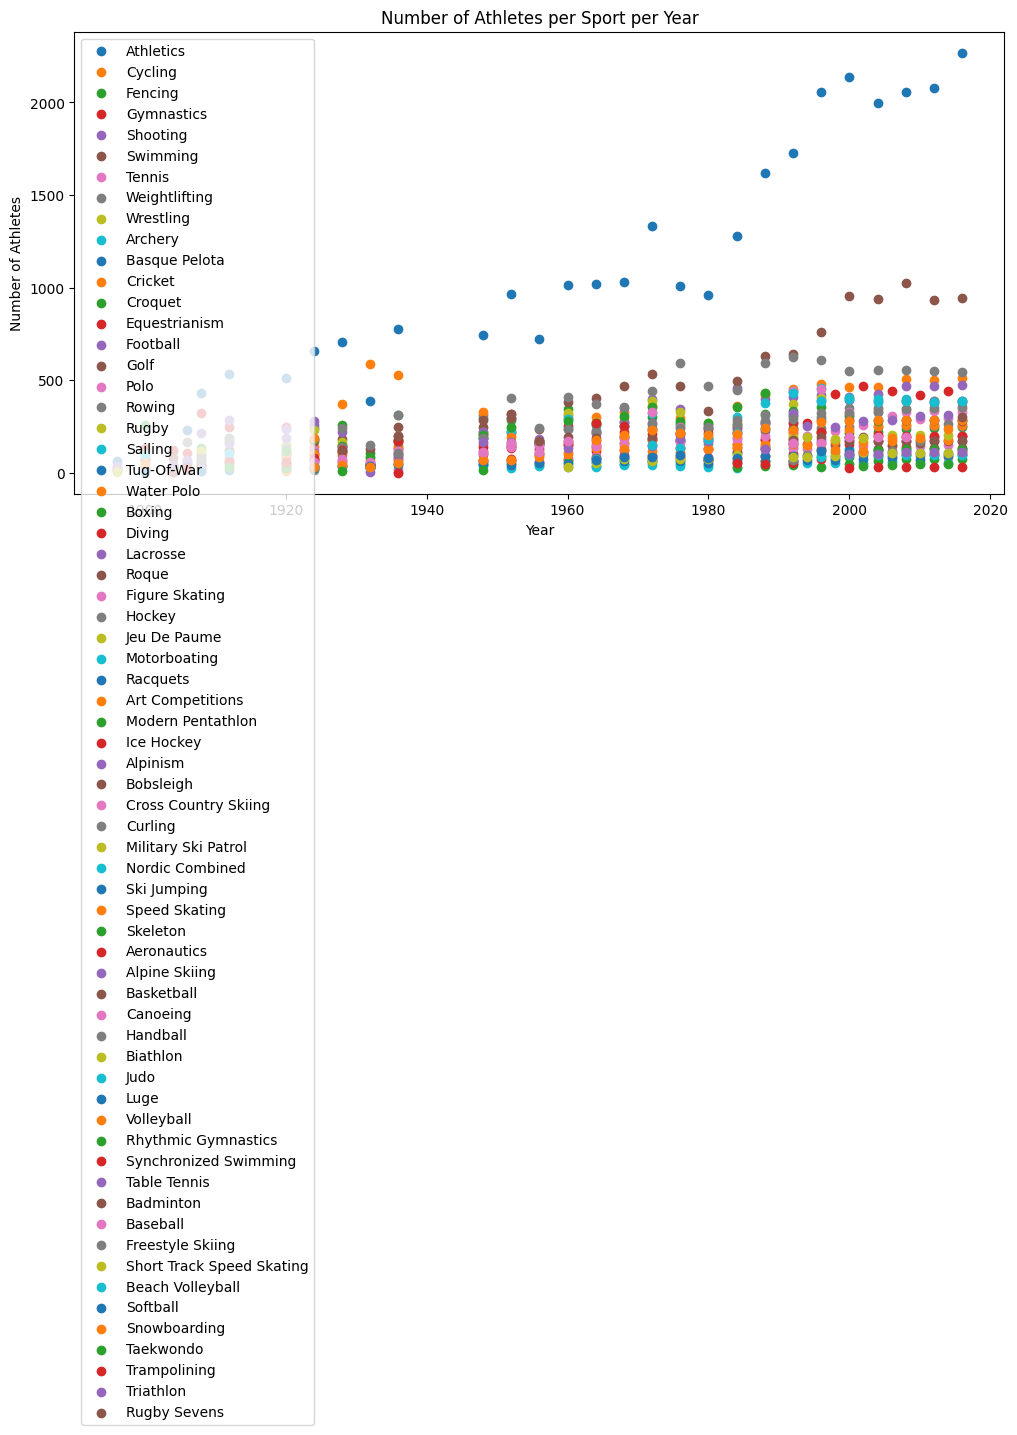

In [26]:
athletes_per_sport_per_year = df.groupby(['Year', 'Sport'])['Name'].nunique()

df_athletes = athletes_per_sport_per_year.reset_index()


plt.figure(figsize=(12, 6))
for sport in df_athletes['Sport'].unique():
    data = df_athletes[df_athletes['Sport'] == sport]
    plt.scatter(data['Year'], data['Name'], label=sport)

plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Number of Athletes per Sport per Year')
plt.legend()
plt.show()

**Sport başına sporcu sayısının dağılımını çiziniz. Yıla ve Mevsime göre gruplandırın ve her spor dalındaki sporcuları sayın

<Figure size 1200x600 with 0 Axes>

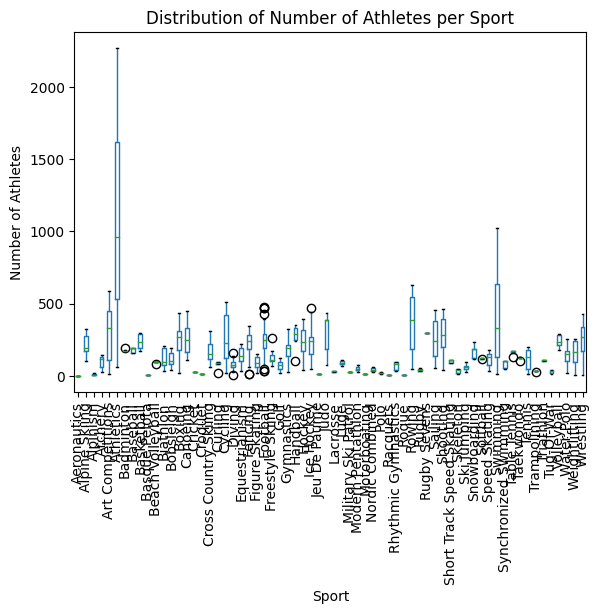

In [27]:
# Yıla ve mevsime göre gruplandırılmış sporcu sayılarını hesapla
athletes_per_sport = df.groupby(['Year', 'Season', 'Sport'])['Name'].nunique()

# Veri çerçevesini yeniden düzenle
df_athletes = athletes_per_sport.reset_index()

# Spor başına sporcu sayısının dağılımını çiz
plt.figure(figsize=(12, 6))
boxplot = df_athletes.boxplot(column='Name', by=['Sport'], grid=False)
plt.xlabel('Sport')
plt.ylabel('Number of Athletes')
plt.title('Distribution of Number of Athletes per Sport')
plt.suptitle('')
plt.xticks(rotation=90)
plt.show()

**Event ve Spor başına sporcu sayısını göstermek için bir headmap kullanın.

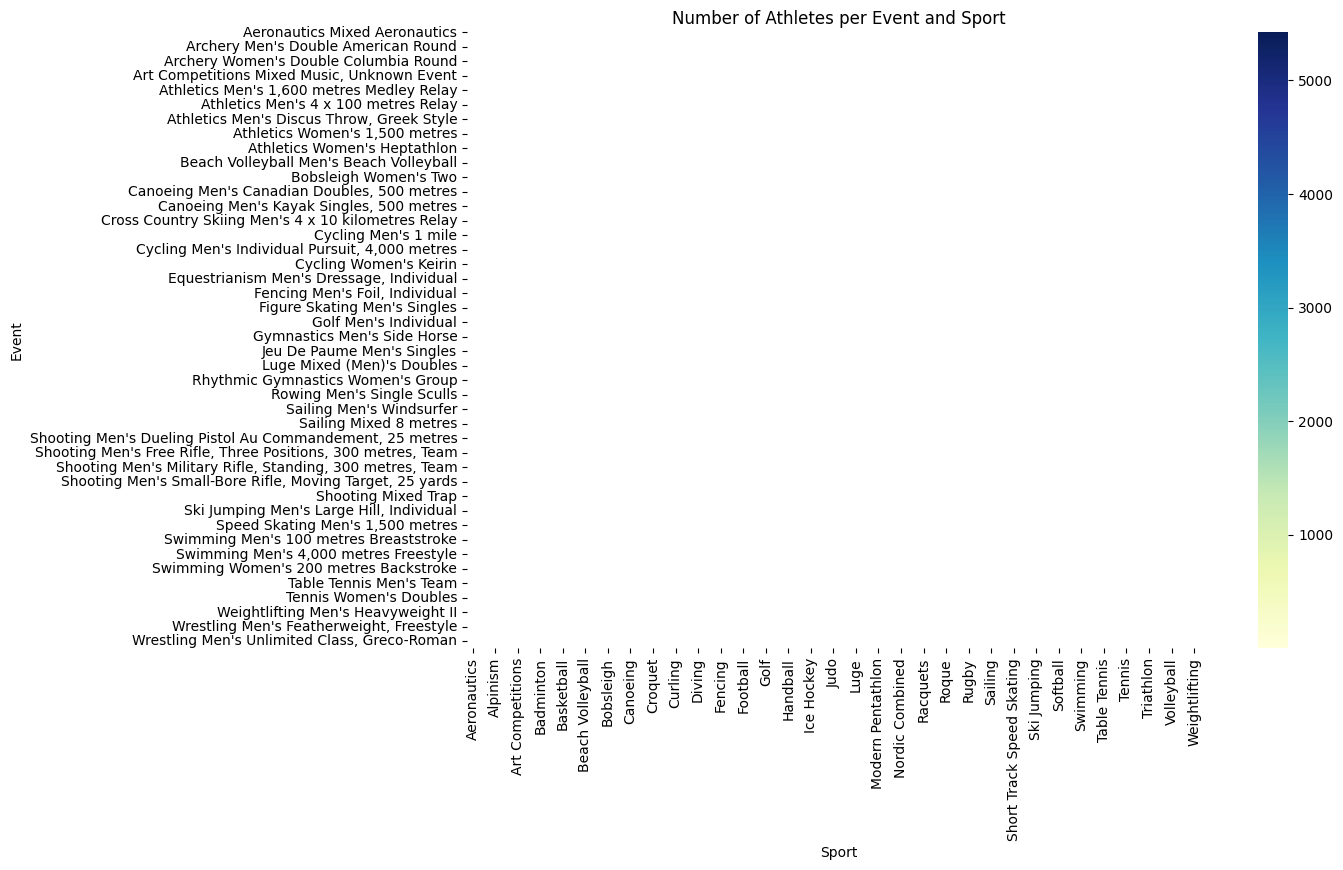

In [28]:
athletes_per_event_sport = df.groupby(['Event', 'Sport'])['Name'].nunique()

# Veri çerçevesini yeniden düzenle
df_athletes = athletes_per_event_sport.reset_index()

# Event ve Spor başına sporcu sayısı tablosunu oluştur
athlete_counts = df_athletes.pivot(index='Event', columns='Sport', values='Name')

# Heatmap'i çiz
plt.figure(figsize=(12, 8))
sns.heatmap(athlete_counts, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Number of Athletes per Event and Sport')
plt.xlabel('Sport')
plt.ylabel('Event')
plt.xticks(rotation=90)
plt.show()

**Yalnızca Yaz Olimpiyatları verileri için Event ve Sport başına sporcu sayısını bir pasta grafiğinde gösterin.

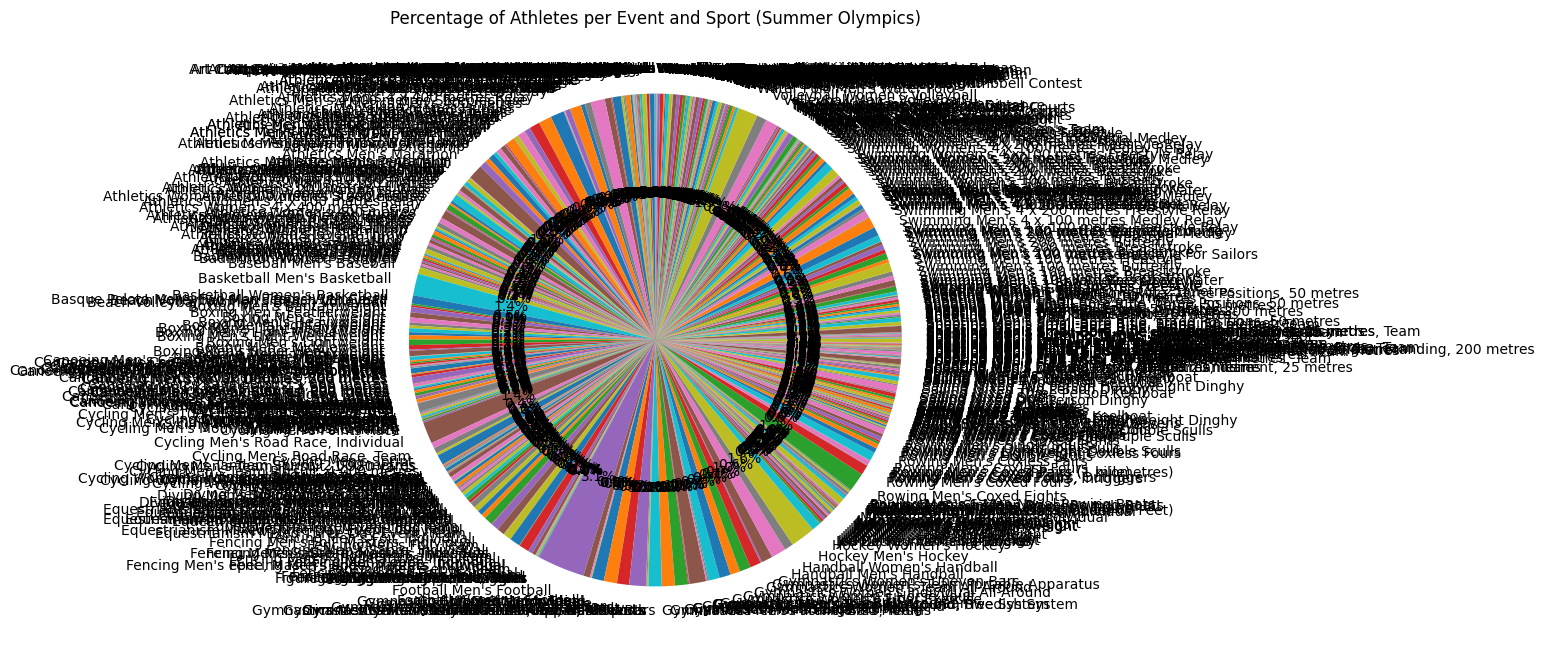

In [29]:
# Yalnızca Yaz Olimpiyatları verilerini seç
df_summer = df[df['Season'] == 'Summer']

# Event ve Sport başına sporcu sayılarını hesapla
athletes_per_event_sport = df_summer.groupby(['Event', 'Sport'])['Name'].nunique()

# Veri çerçevesini yeniden düzenle
df_athletes = athletes_per_event_sport.reset_index()

# Event ve Sport başına sporcu sayısı tablosunu oluştur
athlete_counts = df_athletes.pivot(index='Event', columns='Sport', values='Name')

# Pasta grafiğini çiz
plt.figure(figsize=(12, 8))
athlete_counts.sum(axis=1).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Athletes per Event and Sport (Summer Olympics)')
plt.ylabel('')
plt.show()